In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Original Image: width= 1276 ,height= 725
Template Image: width= 182 ,height= 119
Method =  cv2.TM_SQDIFF
Template Matching Image: width= 1095 ,height= 607
minV =  25632.0 , maxV =  241900544.0


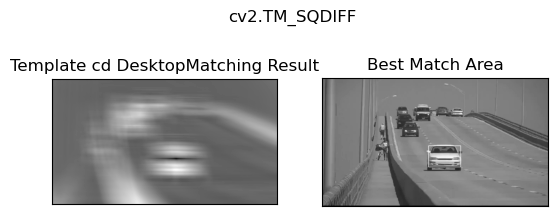

Method =  cv2.TM_SQDIFF_NORMED
Template Matching Image: width= 1095 ,height= 607
minV =  4.935761171509512e-05 , maxV =  0.9247838258743286


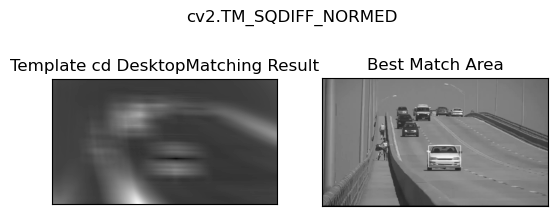

Method =  cv2.TM_CCORR
Template Matching Image: width= 1095 ,height= 607
minV =  -36755120.0 , maxV =  90732520.0


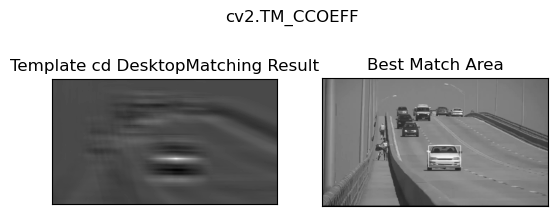

Method =  cv2.TM_CCORR_NORMED
Template Matching Image: width= 1095 ,height= 607
minV =  -0.4731316864490509 , maxV =  0.9998587965965271


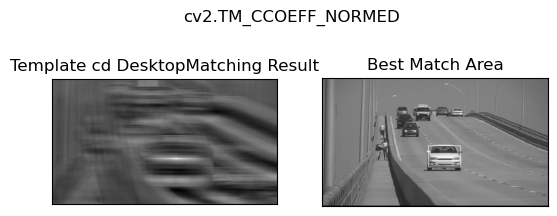

Method =  cv2.TM_CCOEFF
Template Matching Image: width= 1095 ,height= 607
minV =  204143072.0 , maxV =  519278912.0


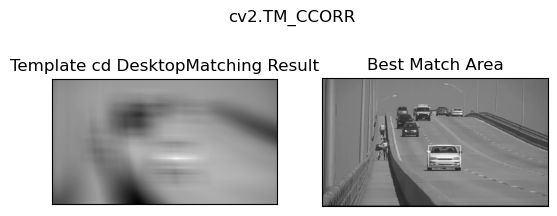

Method =  cv2.TM_CCOEFF_NORMED
Template Matching Image: width= 1095 ,height= 607
minV =  0.7585409879684448 , maxV =  0.9999752640724182


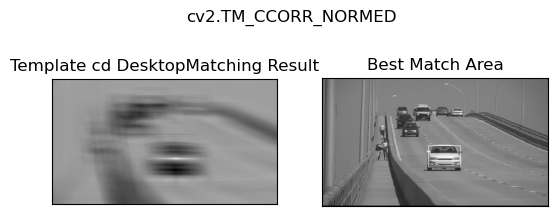

In [5]:
#read souce image from file.
image = cv2.imread(r'C:\Users\ffah\Desktop\Projects\BEng Project\SIIT ML\Robotics Lecture\Robotics_code\week4\Car\CarOriginal.jpg',0)
#make a copy of source image
image2 = image.copy()
# define width,height of source image
hSI, wSI = image.shape[:2]
print("Original Image: width=",wSI,",height=",hSI)
#read template image from file
template = cv2.imread(r'C:\Users\ffah\Desktop\Projects\BEng Project\SIIT ML\Robotics Lecture\Robotics_code\week4\Car\CarTemplate.jpg',0)
hT, wT = template.shape[:2]
print("Template Image: width=",wT,",height=",hT)

#create a list of all 6 methods for matching comparison.
methods = ['cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED', 'cv2.TM_CCOEFF', 
           'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED']
#for loop to test out all 6 methods for matching comparison.
for meth in methods:
    image = image2.copy()
    method = eval(meth) # using each matching comparison method
    print("Method = ",methods[eval(meth)])
    # "matchTemplate" : apply template Matching
    Mresult = cv2.matchTemplate(image,template,method)
    hM, wM = Mresult.shape[:2] # define width,height of template matching
    print("Template Matching Image: width=",wM,",height=",hM)
    
    # "minMaxLoc" : find the global max/min values and its location
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(Mresult)
    print("minV = ",min_val,", maxV = ",max_val)
    # If the "TM_SQDIFF" or "TM_SQDIFF_NORMED" is used, match gives minimum value
    # then assign top-left pixel of bounding box around matched result
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else: # else other method is used, match gives maximum value
        top_left = max_loc
    # assign bottom-right pixel of bounding box around matched result
    bottom_right = (top_left[0] + wT, top_left[1] + hT)
    # draw rectangle bounding box around the best matched area in original image
    cv2.rectangle(image,top_left, bottom_right, (255,255,255), 2)

    plt.subplot(221),plt.imshow(Mresult,cmap = 'gray')
    plt.title('Template cd DesktopMatching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(222),plt.imshow(image,cmap = 'gray')
    plt.title('Best Match Area'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()